In [6]:
# dependencies
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt

In [8]:
# csv path saved to variable-- will need to change the final directory
data = "Construction_Permits_Issued_since_2010.csv"

In [10]:
# Read and display the CSV with Pandas
development_data_pd = pd.read_csv(data, encoding = "utf-8")
# development_data_pd.head(5)
# development_data_pd.head(10)

C:\Users\lcc25\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,26,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DATA CLEAN UP

In [12]:

# filter to past 5 years for each year of interest
filtered_5y_DF18 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2018, : ]
filtered_5y_DF17 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2017, : ]
filtered_5y_DF16 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2016, : ]
filtered_5y_DF15 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2015, : ]
filtered_5y_DF14 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2014, : ]
filtered_5y_DF13 = development_data_pd.loc[development_data_pd['CalendarYearIssued'] == 2013, : ]


In [14]:
# Reduce data points to dataframes by year
reducedpermit_5yr_DF18 = filtered_5y_DF18[[
    'CalendarYearIssued',
    'PermitClass', 
    'StatusCurrent']]
reducedpermit_5yr_DF17 = filtered_5y_DF17[[
     'CalendarYearIssued',
     'PermitClass', 
     'StatusCurrent']]
reducedpermit_5yr_DF16 = filtered_5y_DF16[[
     'CalendarYearIssued',
     'PermitClass', 
     'StatusCurrent']]
reducedpermit_5yr_DF15 = filtered_5y_DF15[[
    'CalendarYearIssued',
    'PermitClass', 
    'StatusCurrent']]
reducedpermit_5yr_DF14 = filtered_5y_DF14[[
     'CalendarYearIssued',
     'PermitClass', 
     'StatusCurrent']]
reducedpermit_5yr_DF13 = filtered_5y_DF13[[
     'CalendarYearIssued',
     'PermitClass', 
     'StatusCurrent']]

In [16]:
# Startswith runs a little slower, both work.  
# def residential (row):
#     if str(row).startswith('C'):
#         return 'Commercial'
#     if str(row).startswith('R'):
#         return 'Residential'
def residential (row):
    if str(row)[0] == 'C':
        return 'Commercial'
    if str(row)[0] == 'R':
        return 'Residential'

reducedpermit_5yr_DF18.loc[:,'Permit'] = reducedpermit_5yr_DF18.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF17.loc[:,'Permit'] = reducedpermit_5yr_DF17.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF16.loc[:,'Permit'] = reducedpermit_5yr_DF16.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF15.loc[:,'Permit'] = reducedpermit_5yr_DF15.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF14.loc[:,'Permit'] = reducedpermit_5yr_DF14.PermitClass.apply(lambda row: residential(row))
reducedpermit_5yr_DF13.loc[:,'Permit'] = reducedpermit_5yr_DF13.PermitClass.apply(lambda row: residential(row))


# reducedpermit_5yr_DF.reset_index()
# reducedpermit_5yr_DF.head()
# list(reducedpermit_5yr_DF)
# fig, ax = plt.subplots(1, 1)
# df = reducedpermit_5yr_DF18
# ax.get_xaxis().set_visible(False)   # Hide Ticks
# df.plot(table=True, ax=ax)
# show.plot()
reducedpermit_5yr_DF18.head()

C:\Users\lcc25\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\lcc25\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,CalendarYearIssued,PermitClass,StatusCurrent,Permit
479256,2018,Residential,Active,Residential
479257,2018,Residential,Active,Residential
479258,2018,Commercial,Active,Commercial
479259,2018,Residential,Active,Residential
479260,2018,Commercial,Active,Commercial


In [17]:
# reducedpermit_5yr_DF18

# get list of values for each year of interest 2018, 2017, 2016 commercial Permit Status

little_reducedpermit_5yr_DF18c = reducedpermit_5yr_DF18.loc[reducedpermit_5yr_DF18['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF18c = little_reducedpermit_5yr_DF18c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF18c = little_reducedpermit_5yr_DF18c.loc[little_reducedpermit_5yr_DF18c['Permit'] >= 10]
x_axis = little_reducedpermit_5yr_DF18c['StatusCurrent'].tolist()
y_axis18c = little_reducedpermit_5yr_DF18c['Permit'].tolist()


little_reducedpermit_5yr_DF17c = reducedpermit_5yr_DF17.loc[reducedpermit_5yr_DF17['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF17c = little_reducedpermit_5yr_DF17c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF17c = little_reducedpermit_5yr_DF17c.loc[little_reducedpermit_5yr_DF17c['Permit'] >= 10]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis17c = little_reducedpermit_5yr_DF17c['Permit'].tolist()

little_reducedpermit_5yr_DF16c = reducedpermit_5yr_DF16.loc[reducedpermit_5yr_DF16['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF16c = little_reducedpermit_5yr_DF16c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF16c = little_reducedpermit_5yr_DF16c.loc[little_reducedpermit_5yr_DF16c['Permit'] >= 10]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis16c = little_reducedpermit_5yr_DF16c['Permit'].tolist()

little_reducedpermit_5yr_DF15c = reducedpermit_5yr_DF15.loc[reducedpermit_5yr_DF15['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF15c = little_reducedpermit_5yr_DF15c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF15c = little_reducedpermit_5yr_DF15c.loc[little_reducedpermit_5yr_DF15c['Permit'] >= 10]
x_axis = little_reducedpermit_5yr_DF15c['StatusCurrent'].tolist()
y_axis15c = little_reducedpermit_5yr_DF15c['Permit'].tolist()


little_reducedpermit_5yr_DF14c = reducedpermit_5yr_DF14.loc[reducedpermit_5yr_DF14['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF14c = little_reducedpermit_5yr_DF14c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF14c = little_reducedpermit_5yr_DF14c.loc[little_reducedpermit_5yr_DF14c['Permit'] >= 10]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis14c = little_reducedpermit_5yr_DF14c['Permit'].tolist()

little_reducedpermit_5yr_DF13c = reducedpermit_5yr_DF13.loc[reducedpermit_5yr_DF13['Permit'] == 'Commercial', :]
little_reducedpermit_5yr_DF13c = little_reducedpermit_5yr_DF13c.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF13c = little_reducedpermit_5yr_DF13c.loc[little_reducedpermit_5yr_DF13c['Permit'] >= 10]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis13c = little_reducedpermit_5yr_DF13c['Permit'].tolist()

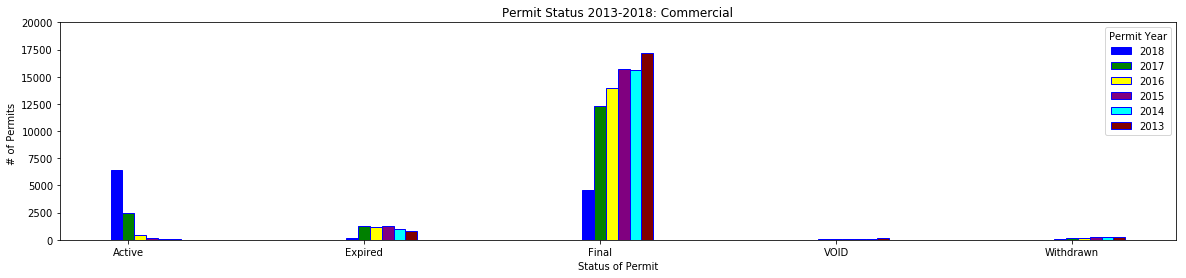

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors

# Build the plots for new permits by calendar year issued and remodel permits by calendar year issued
N = 5
ind = np.arange(N)
cmaps = ['Blue', 'Green', 'Yellow', 'Purple', 'Aqua','Maroon']


# Set plot size
plt.figure(figsize=(20, 4))

#label for x-axis
plt.xlabel("Status of Permit")
#label for y-axis
plt.ylabel("# of Permits ")
# Set with of bar
width = 0.05       # the width of the bars

permitStatus_2018c  = plt.bar(ind-width, y_axis18c, width, color=cmaps[0], align = "center", label="2018", edgecolor='blue')
permitStatus_2017c  = plt.bar(ind, y_axis17c, width,align="center", color=cmaps[1], label="2017", edgecolor='blue')
permitStatus_2016c  = plt.bar(ind + (1*width), y_axis16c, width, color=cmaps[2], align="center", edgecolor='blue', label="2016")
permitStatus_2015c = plt.bar(ind + (2*width), y_axis15c, width, color=cmaps[3], align="center", label="2015", edgecolor='blue')
permitStatus_2014c = plt.bar(ind + (3*width), y_axis14c, width, color=cmaps[4], align="center", label="2014", edgecolor='blue')
permitStatus_2013c = plt.bar(ind + (4*width), y_axis13c, width, color=cmaps[5], align="center", edgecolor='blue', label="2013")

# add title to legend and location
lgnd = plt.legend(handles = [permitStatus_2018c, permitStatus_2017c, permitStatus_2016c, permitStatus_2015c, permitStatus_2014c, permitStatus_2013c], loc="upper right", title="Permit Year")
plt.xticks(ind,x_axis)

# make title
plt.title("Permit Status 2013-2018: Commercial")

# The y limits of our plot is to 0 to 15000
plt.ylim(0, 20000)
#plt.autoscale(tight=True)


# Save Figure
plt.savefig("Permits_Status_5yr_commercial.png")

In [19]:
# Set up values for Residental Permit Status 2018-13
little_reducedpermit_5yr_DF18r = reducedpermit_5yr_DF18.loc[reducedpermit_5yr_DF18['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF18r = little_reducedpermit_5yr_DF18r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF18r = little_reducedpermit_5yr_DF18r.loc[little_reducedpermit_5yr_DF18r['Permit'] >= 38]
x_axis = little_reducedpermit_5yr_DF18r['StatusCurrent'].tolist()
y_axis18r = little_reducedpermit_5yr_DF18r['Permit'].tolist()


little_reducedpermit_5yr_DF17r = reducedpermit_5yr_DF17.loc[reducedpermit_5yr_DF17['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF17r = little_reducedpermit_5yr_DF17r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF17r = little_reducedpermit_5yr_DF17r.loc[little_reducedpermit_5yr_DF17r['Permit'] >= 25]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis17r = little_reducedpermit_5yr_DF17r['Permit'].tolist()

little_reducedpermit_5yr_DF16r = reducedpermit_5yr_DF16.loc[reducedpermit_5yr_DF16['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF16r = little_reducedpermit_5yr_DF16r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF16r = little_reducedpermit_5yr_DF16r.loc[little_reducedpermit_5yr_DF16r['Permit'] >= 20]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis16r = little_reducedpermit_5yr_DF16r['Permit'].tolist()

little_reducedpermit_5yr_DF15r = reducedpermit_5yr_DF15.loc[reducedpermit_5yr_DF15['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF15r = little_reducedpermit_5yr_DF15r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF15r = little_reducedpermit_5yr_DF15r.loc[little_reducedpermit_5yr_DF15r['Permit'] >= 38]
x_axis = little_reducedpermit_5yr_DF15r['StatusCurrent'].tolist()
y_axis15r = little_reducedpermit_5yr_DF15r['Permit'].tolist()


little_reducedpermit_5yr_DF14r = reducedpermit_5yr_DF14.loc[reducedpermit_5yr_DF14['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF14r = little_reducedpermit_5yr_DF14r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF14r = little_reducedpermit_5yr_DF14r.loc[little_reducedpermit_5yr_DF14r['Permit'] >= 25]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis14r = little_reducedpermit_5yr_DF14r['Permit'].tolist()

little_reducedpermit_5yr_DF13r = reducedpermit_5yr_DF13.loc[reducedpermit_5yr_DF13['Permit'] == 'Residential', :]
little_reducedpermit_5yr_DF13r = little_reducedpermit_5yr_DF13r.groupby('StatusCurrent', as_index=False).agg({"Permit" : "count"})
little_reducedpermit_5yr_DF13r = little_reducedpermit_5yr_DF13r.loc[little_reducedpermit_5yr_DF13r['Permit'] >= 20]
# x_axis17c = little_reducedpermit_5yr_DF17c['StatusCurrent'].tolist()
y_axis13r = little_reducedpermit_5yr_DF13r['Permit'].tolist()

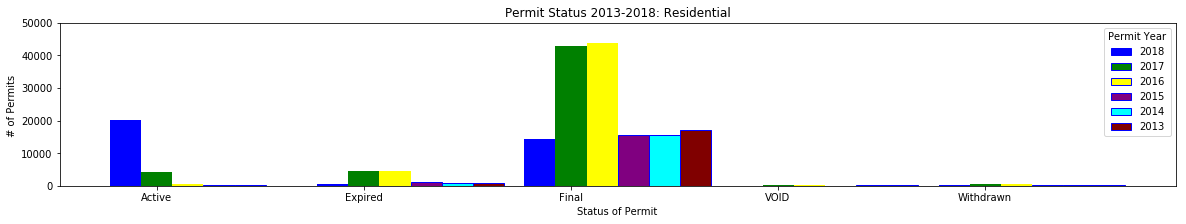

In [20]:
# Build the plots for new permits by calendar year issued and remodel permits by calendar year issued
N = 5
ind = np.arange(N)
# x-axis for the two different scatter plots should be years_list
# y-axis for the two different scatter plots should be new_permits_completed_by_year and remodel_permits_completed_by_year
plt.figure(figsize=(20, 3))
#label for x-axis
plt.xlabel("Status of Permit")
#label for y-axis
plt.ylabel("# of Permits ")

width = 0.15       # the width of the bars

# plot the data from each year on plot
permitStatus_2018r  = plt.bar(ind-width, y_axis18r, width, color=cmaps[0], align="center", label="2018")
permitStatus_2017r  = plt.bar(ind, y_axis17r, width, color=cmaps[1], align="center", label="2017")
permitStatus_2016r  = plt.bar(ind + (1*width), y_axis16r, width, color=cmaps[2], align="center", label="2016")
permitStatus_2015r = plt.bar(ind + (2*width), y_axis15c, width, color=cmaps[3], align="center", label="2015", edgecolor='blue')
permitStatus_2014r = plt.bar(ind + (3*width), y_axis14c, width, color=cmaps[4], align="center", label="2014", edgecolor='blue')
permitStatus_2013r = plt.bar(ind + (4*width), y_axis13c, width, color=cmaps[5], align="center", edgecolor='blue', label="2013")

# add title to legend and location
lgnd = plt.legend(handles = [permitStatus_2018c, permitStatus_2017c, permitStatus_2016c, permitStatus_2015c, permitStatus_2014c, permitStatus_2013c], loc="upper right", title="Permit Year")
plt.xticks(ind,x_axis)

# make title
plt.title("Permit Status 2013-2018: Residential")

# The y limits of our plot is to 0 to 15000
plt.ylim(0, 50000)
# plt.autoscale(tight=True)


# Save Figure
plt.savefig("Permits_Status_5yr_Residential.png")